##<font color = blue>**BigQuery Joins & pitfalls related to joins**</font>

**Task 1. Create a new dataset to store your tables**

1. In your BigQuery project, create a new dataset titled ecommerce.

2. Click the three dots next to your Project ID and select Create dataset.

3. The Create dataset dialog opens.

4. Set the dataset ID to ecommerce.

5. Leave the other options at their default values, and click Create dataset.

6. In the left pane, you see an ecommerce table listed under your project.


In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving lab3img1.png to lab3img1.png


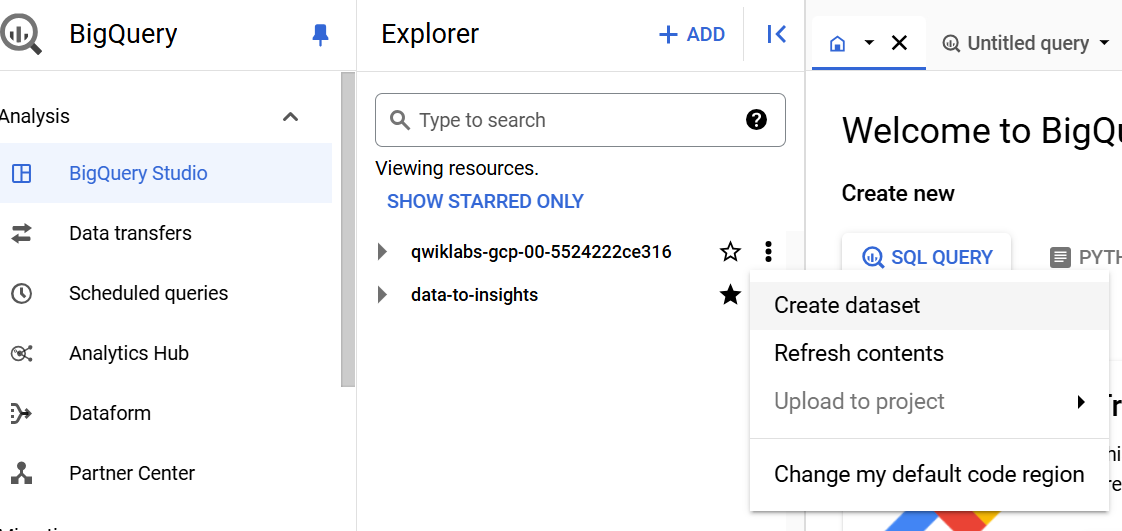

In [ ]:
Image('lab3img1.png', width = 600)

In [ ]:
uploaded = files.upload()

Saving lab3img2.png to lab3img2.png


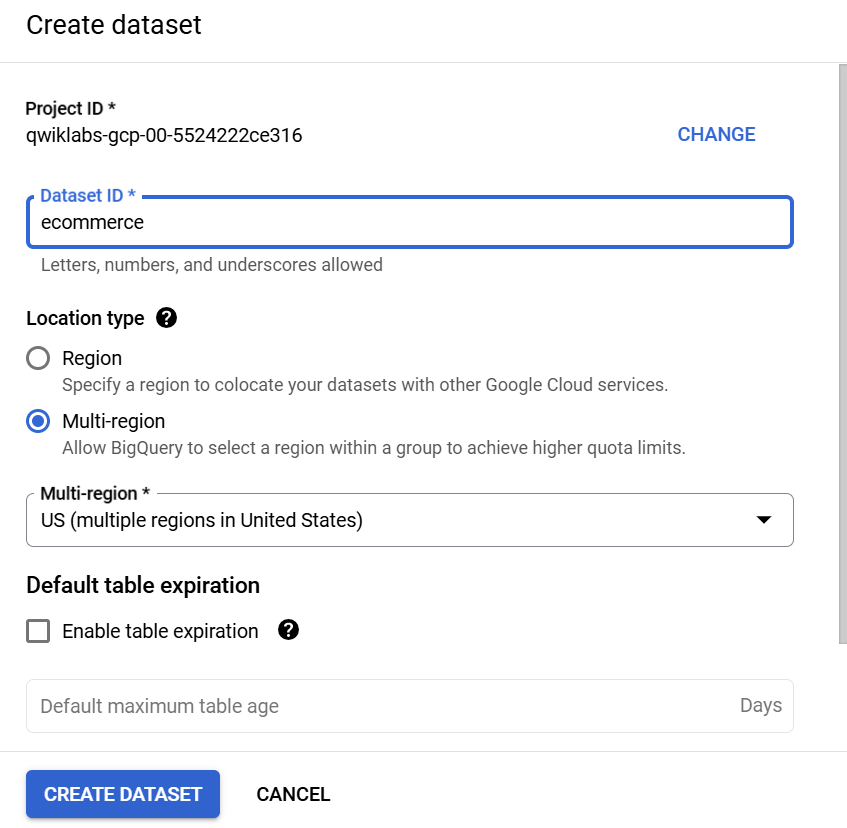

In [ ]:
Image('lab3img2.png', width = 500)

In [ ]:
uploaded = files.upload()

Saving lab3img3.png to lab3img3.png


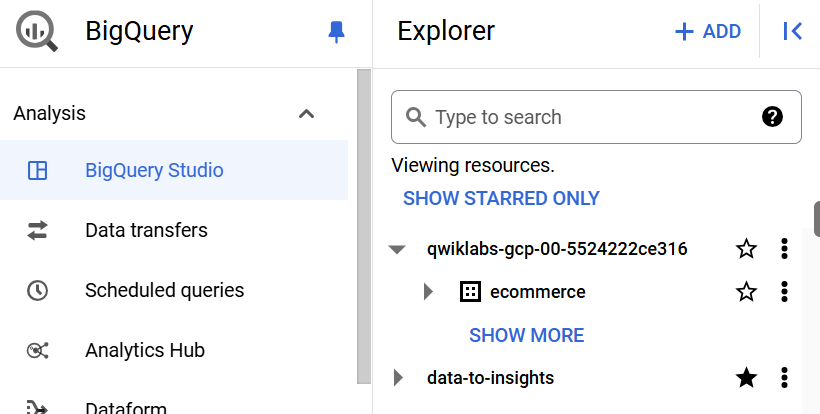

In [ ]:
Image('lab3img3.png', width = 600)

**Task 2. Pin the lab project in BigQuery**

BigQuery public datasets are not displayed by default. To open the public datasets project, copy data-to-insights.

Click + Add > Star a project by name then paste the data-to-insights name.

Click Star.

The data-to-insights project is listed in the Explorer section. In the above image we can already see that 'data-to-insights' is starred.

**Task 3. Identify the count of rows returned**

Find how many product names and product SKUs are on the website?


In [ ]:
uploaded = files.upload()

Saving lab3img4.png to lab3img4.png


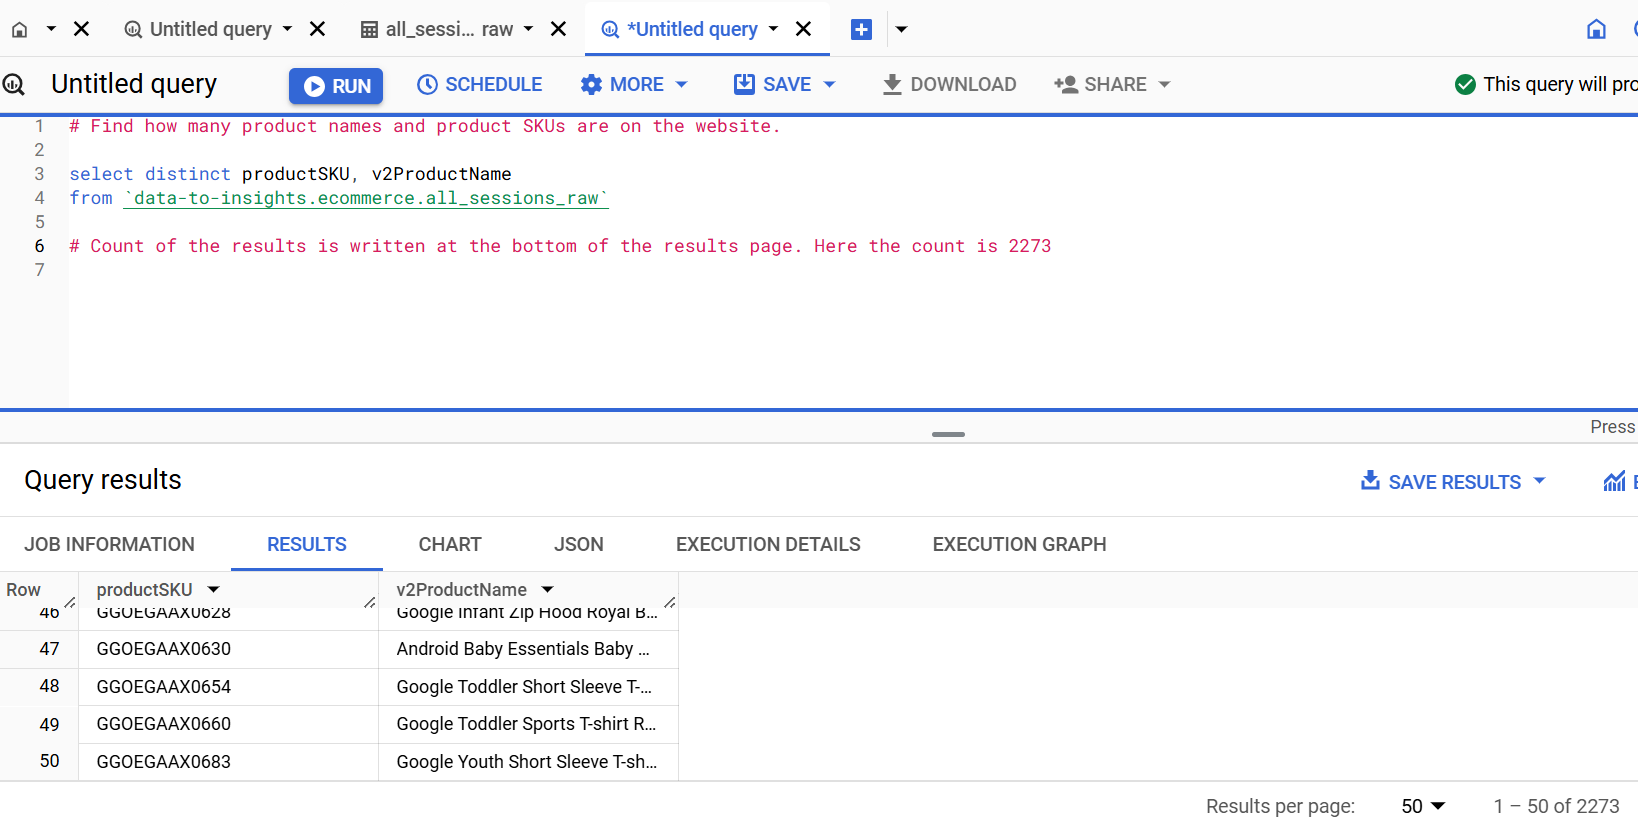

In [ ]:
Image('lab3img4.png', width = 900)

**Task 4. Return a list of 5 product names, product count for every productSKU using String_agg() function**

In [ ]:
uploaded = files.upload()

Saving lab3img5.png to lab3img5.png


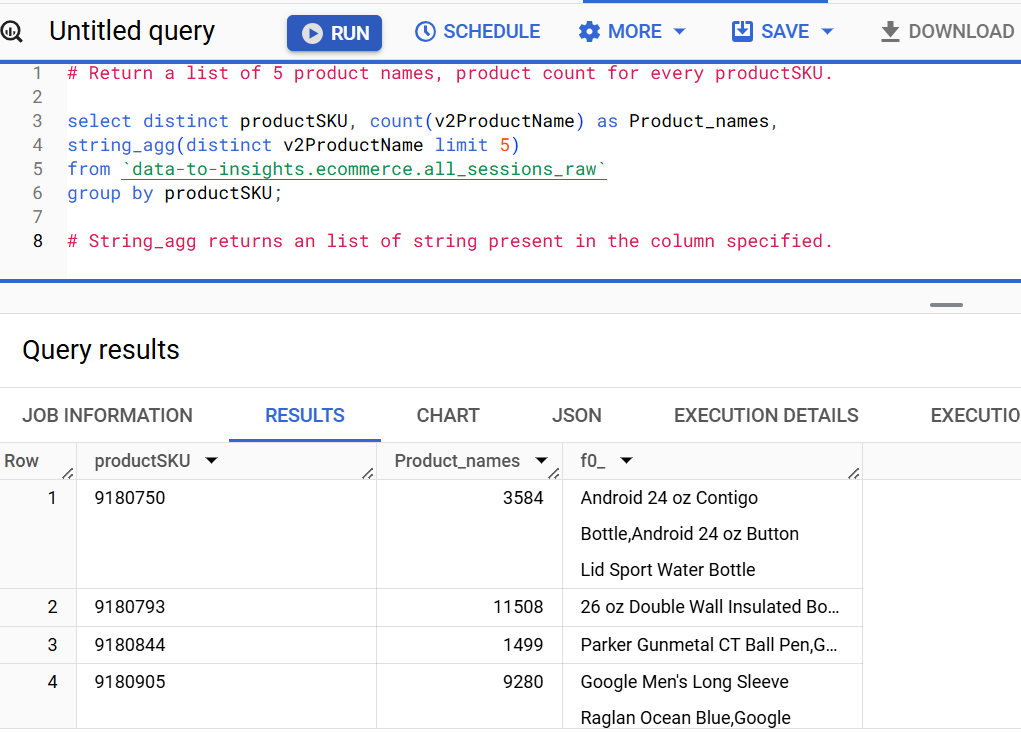

In [ ]:
Image('lab3img5.png', width = 800)

**Task 5. Return a list of 5 product names, product count for every productSKU using String_agg() function & only show me product with product count more than 1 having product names not null**

In [ ]:
uploaded = files.upload()

Saving lab3img6.png to lab3img6.png


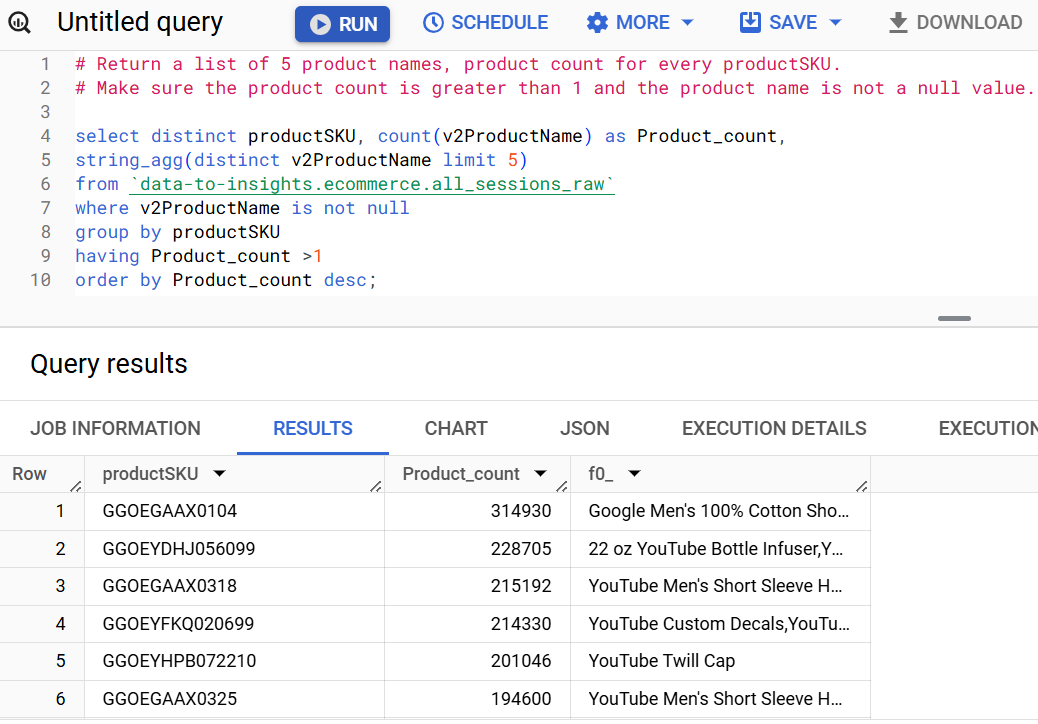

In [ ]:
Image('lab3img6.png', width = 800)

**Task 6. Pitfall: non-unique key**

In inventory tracking, a SKU is designed to uniquely identify one and only one product. For us, it will be the basis of your JOIN condition when you lookup information from other tables. Having a non-unique key can cause serious data issues as you will see.

Write a query to identify all the product names for the SKU 'GGOEGPJC019099'.

In [ ]:
uploaded = files.upload()

Saving lab3img7.png to lab3img7.png


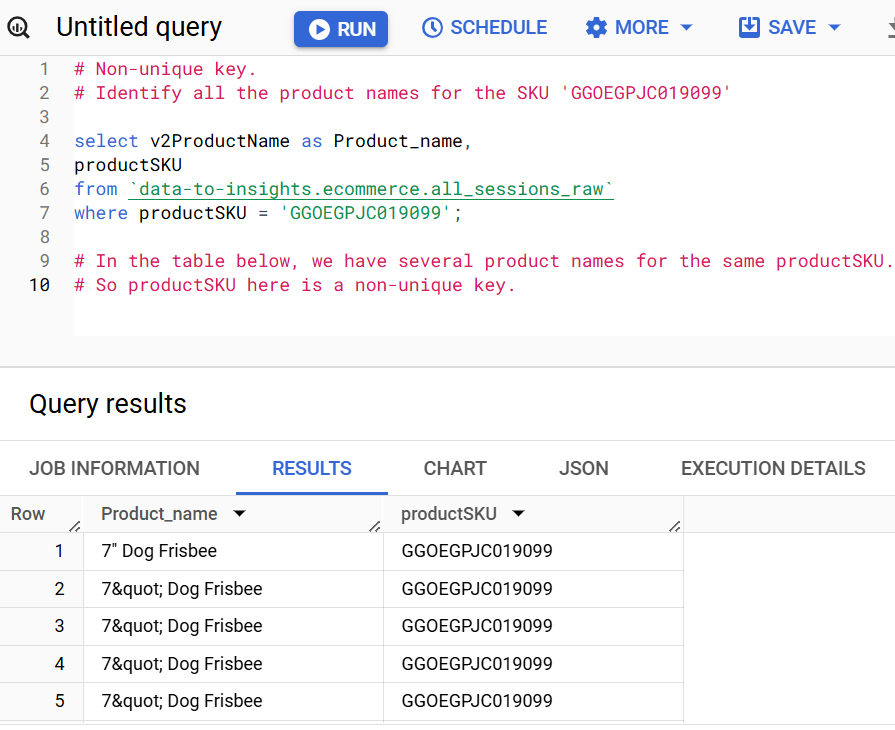

In [ ]:
Image('lab3img7.png', width = 600)

**Task 7. Join pitfall: Unintentional many-to-one SKU relationship**

You now have two datasets: one for inventory stock level (products dataset) and the other for our website analytics (all_sessions_raw dataset).

JOIN the inventory dataset against your website product names and SKUs so you can have the inventory stock level associated with each product for sale on the website.

In [ ]:
uploaded = files.upload()

Saving lab3img8.png to lab3img8.png


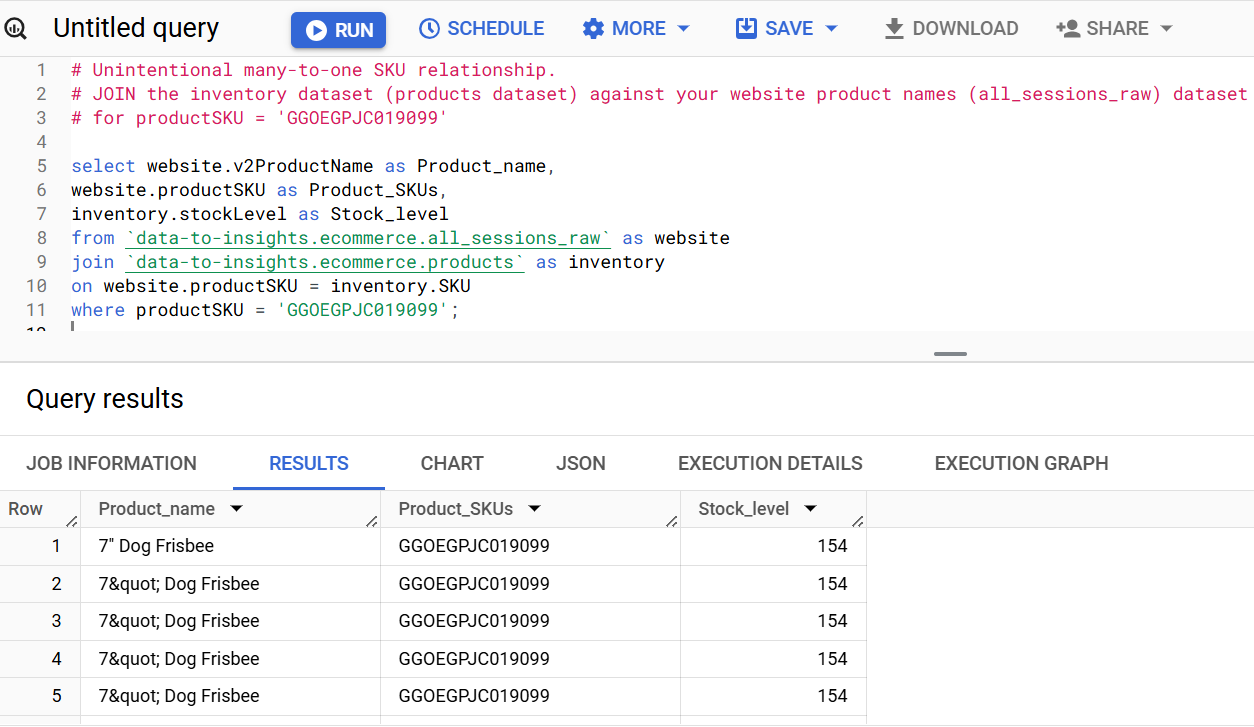

In [ ]:
Image('lab3img8.png', width = 800)

The problem with the result above is there are inventory levels but the stockLevel is showing three times (one for each record).

**Task 8. Cross join pitfall: Expand our previous query to simply SUM the inventory available by product.**

In [ ]:
uploaded = files.upload()

Saving lab3img9.png to lab3img9.png


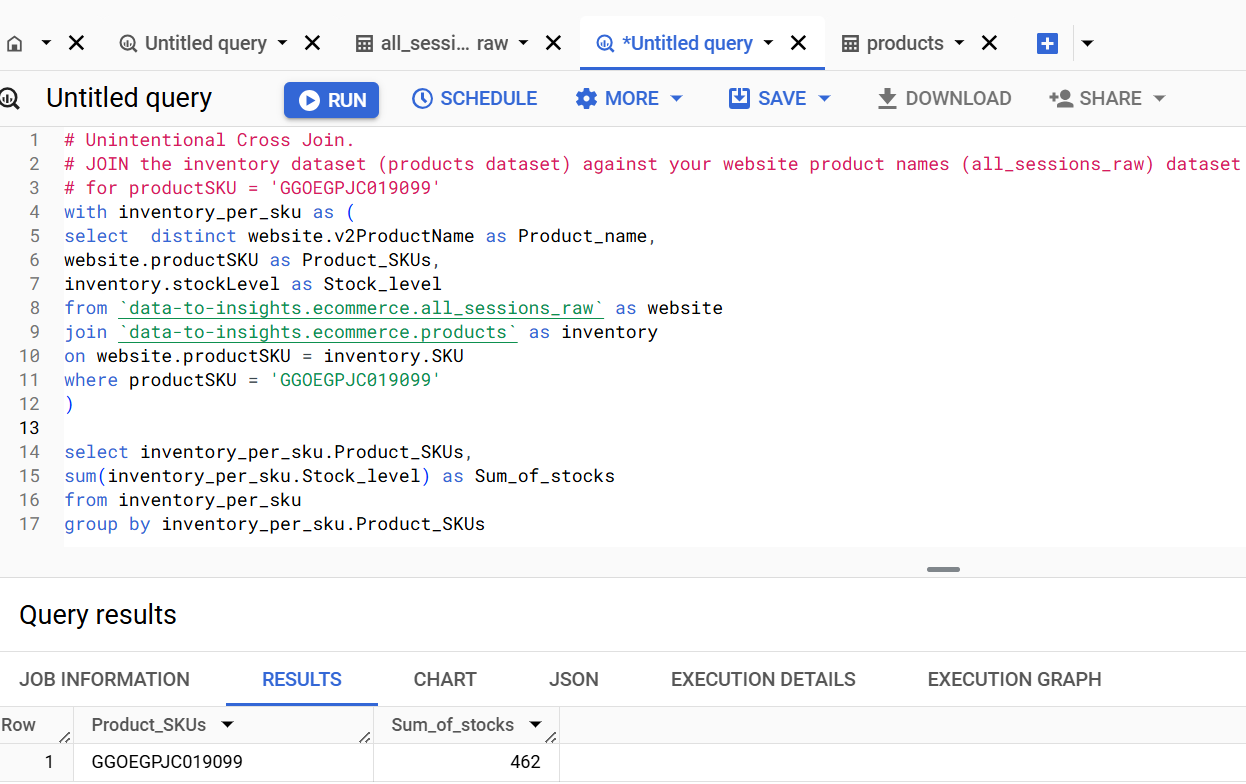

In [ ]:
Image('lab3img9.png', width = 800)

The results here a re problematic as well, since we have sum of stocks as  154 x 3 = 462 or triple counting the inventory! This is called an unintentional cross join.

**Task 9. Join pitfall solution: use distinct SKUs before joining**

Step 1: Gather all the possible names into an array

In [ ]:
uploaded = files.upload()

Saving lab3img10.png to lab3img10.png


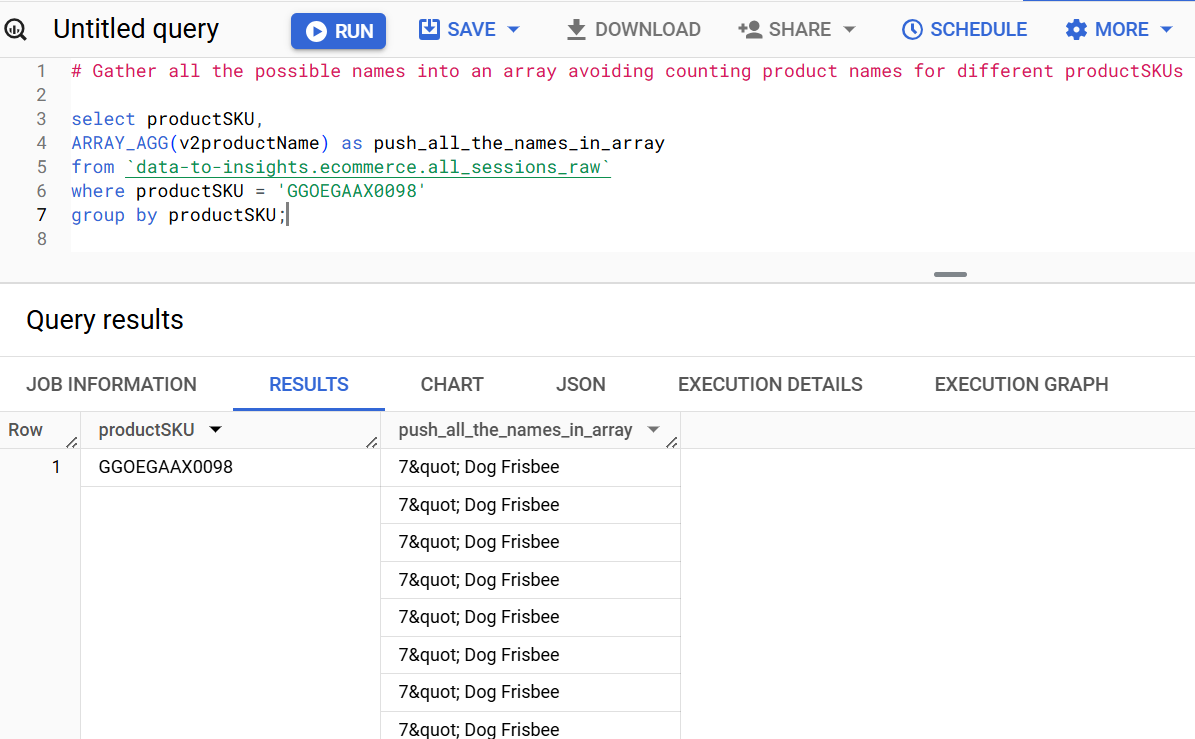

In [ ]:
Image('lab3img10.png', width = 800)

Further you can deduplicate the entries by specifying limit as 1

In [ ]:
uploaded = files.upload()

Saving lab3img11.png to lab3img11.png


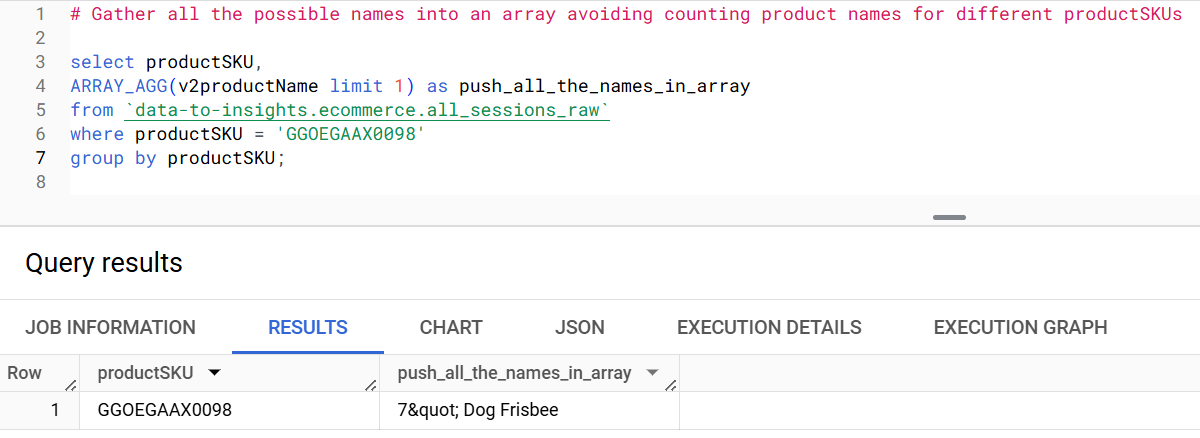

In [ ]:
Image('lab3img11.png', width = 800)

**Task 10. Join pitfall: losing data records after a join**

Now you're ready to join against your product inventory dataset again.

In [ ]:
uploaded = files.upload()

Saving lab3img12.png to lab3img12.png


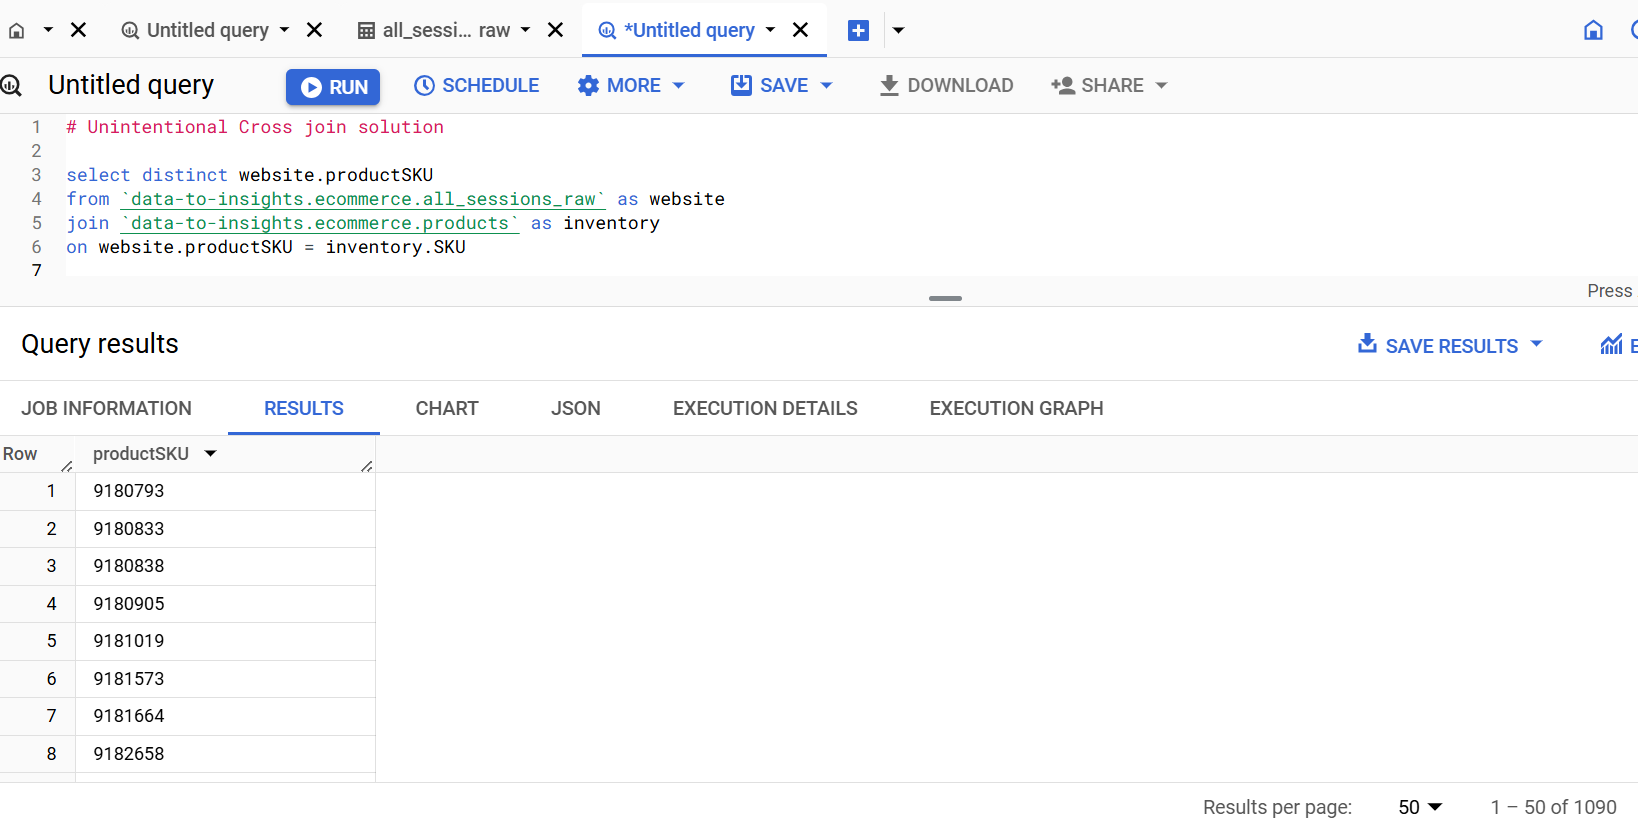

In [ ]:
Image('lab3img12.png', width = 1000)

It seems 819 SKUs were lost after joining the datasets Investigate by adding more specificity in your fields (one SKU column from each dataset).

The question is how can one find missing records.

**Task 11. Join pitfall solution: selecting the correct join type and filtering for NULL**

The default JOIN type is an INNER JOIN which returns records only if there is a SKU match on both the left and the right tables that are joined.

Rewrite the previous query to use a different join type to include all records from the website table, regardless of whether there is a match on a product inventory SKU record. Join type options: INNER JOIN, LEFT JOIN, RIGHT JOIN, FULL JOIN, CROSS JOIN.

In [ ]:
uploaded = files.upload()

Saving lab3img14.png to lab3img14.png


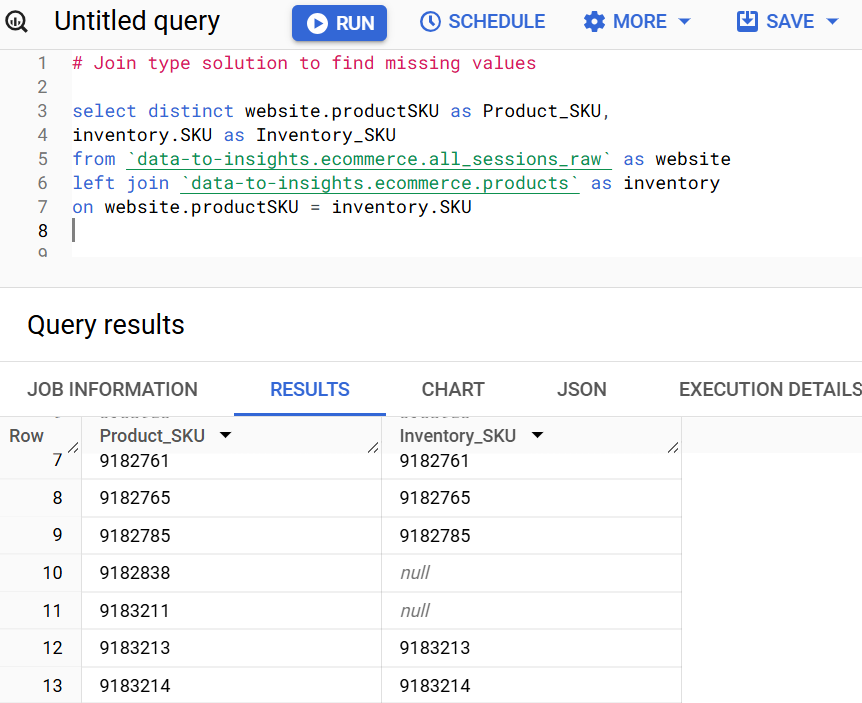

In [ ]:
Image('lab3img14.png', width = 600)

It seems 819 SKUs were lost after joining the datasets Investigate by adding more specificity in your fields (one SKU column from each dataset).

The question is how can one find missing records.

**Task 12. Join pitfall solution: selecting the correct join type and filtering for NULL**

The default JOIN type is an INNER JOIN which returns records only if there is a SKU match on both the left and the right tables that are joined.

Rewrite the previous query to use a different join type to include all records from the website table, regardless of whether there is a match on a product inventory SKU record. Join type options: INNER JOIN, LEFT JOIN, RIGHT JOIN, FULL JOIN, CROSS JOIN.

In [ ]:
uploaded = files.upload()

Saving lab3img15.png to lab3img15.png


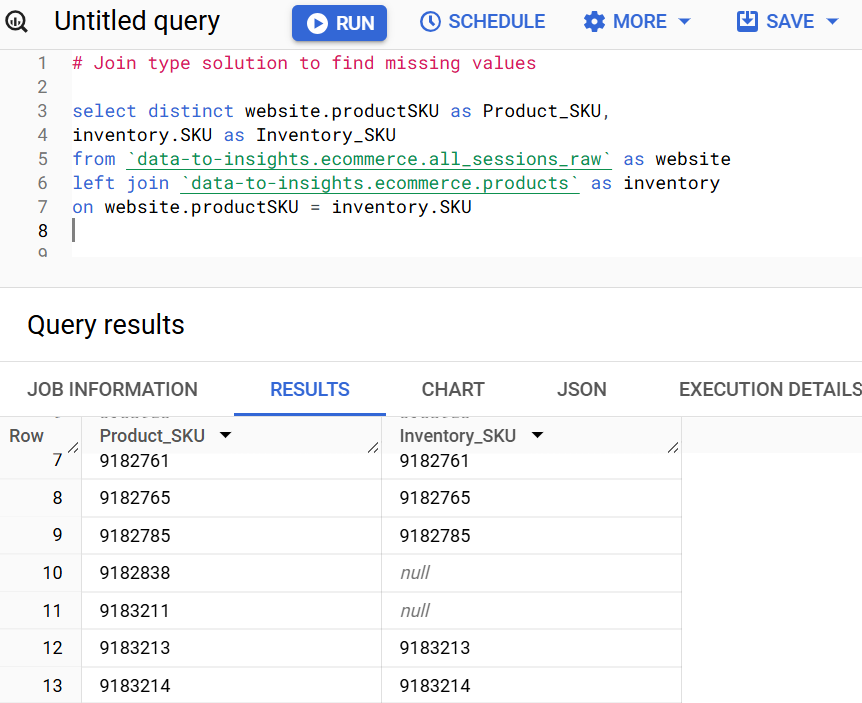

In [ ]:
Image('lab3img15.png', width = 600)

**Task 13. Find how many SKUs are missing from your products inventory set**

Now let us find how many null values were present in the dataset for product SKUs

In [ ]:
uploaded = files.upload()

Saving lab3img16.png to lab3img16.png


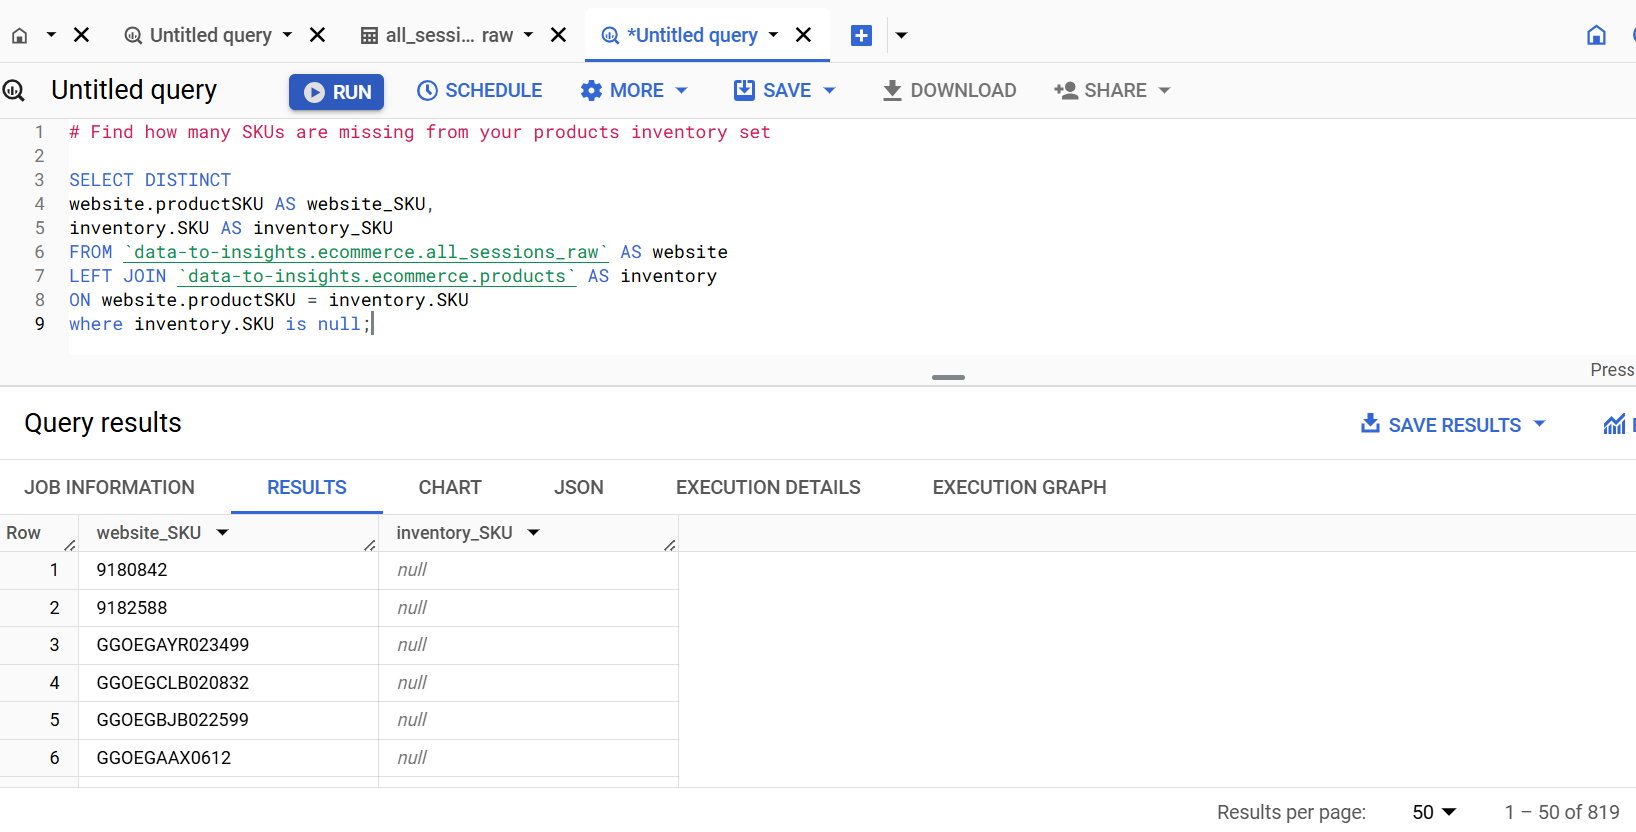

In [ ]:
Image('lab3img16.png', width = 1000)

Remember that by default we have inner join, so if some records are missing the pitfall solution would be to select a right join type and also checking for null values.